In [ ]:
import numpy as np;
import matplotlib.pyplot as plt

## REGRESSION TASK

####**Q1.  Multilinear Regression**
---
---

######**Data Extraction**

In [92]:
data_path_1 = '/content/drive/MyDrive/PRNN assignment 1/Q1 data.txt'

In [93]:
# Load data from 'example4.txt' (assuming it contains string values)
Data = np.genfromtxt(data_path_1, dtype=str, delimiter=",")

# labels of the data
column_labels = Data[0].split("\t")

# Extract data as integers, skipping the first line (column labels)
Data = np.array([[float(x) for x in line.strip().split("\t")] for line in Data[1:]])

split = 0.8
Data_train = Data[:int(split*len(Data)),:]
n_trn , f = Data_train.shape
Data_test = Data[int(split*len(Data)):,:]
n_tst , _ = Data_test.shape

print(column_labels)
print(Data_train.shape)
print(Data_test.shape)

# Normalization
# Calculate mean and standard deviation for each feature
mean_vals = Data.mean(axis=0)
std_vals = Data.std(axis=0)

# Normalize each feature using z-score
data_n = (Data - mean_vals) / std_vals

Data_train_n = data_n[:int(split*len(Data)),:]
Data_test_n = data_n[int(split*len(Data)):,:]
n_trn_n = len(Data_train_n)
n_tst_n = len(Data_test_n)

['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'Y_1', 'Y_2', 'Y_3']
(11200, 13)
(2800, 13)


######**Solutions:** **I) without bias**

In [94]:
# Train
X_train = Data_train[:, :10]
Y_train = Data_train[:, 10:]
# Test
X_test = Data_test[:, :10]
Y_test = Data_test[:, 10:]

In [95]:
W = np.dot(np.linalg.pinv(X_train.T).T, Y_train)
print(W.T)

[[ 0.77394963  0.53681871 -3.13447676 -1.01368484 -1.05853547  1.89727018
  -0.6667644   0.5937164  -1.2633016  -3.03574711]
 [-0.48094389 -2.01790959 -3.42390664  0.24230557 -4.63502219  1.93236199
  -1.36127315  3.40999454 -0.19168376  2.33387929]
 [ 4.89977472 -0.70633463  0.62035464 -4.61995353  1.36079191 -0.80743011
  -0.63722628 -2.20988201  4.04284123  2.30770034]]


In [96]:
i = 7
print(np.dot(X_train[i], W), Y_train[i])

[-2.03464782 -7.13569914  0.27241897] [-2.47667676 -6.57685262 -0.40541365]


In [97]:
# Loss
loss = 0
for i in range(n_tst):
  loss += np.linalg.norm(np.dot(X_test[i], W)-Y_test[i])**2
MS_loss = (loss/(3*n_tst))
print("Mean Square Error = ", MS_loss)

Mean Square Error =  5.888202925992766


###### **Solution: II) with bias**

In [98]:
# Train data
ones = np.ones((n_trn, 1))
X_train_bias = np.append(Data_train[:, :10], ones, axis=1)
Y_train_bias = Data_train[:, 10:]
# Test data
ones = np.ones((n_tst, 1))
X_test_bias = np.append(Data_test[:, :10], ones, axis=1)
Y_test_bias = Data_test[:, 10:]

In [99]:
W = np.dot(np.linalg.pinv(X_train_bias.T).T, Y_train_bias)
print(W.shape)

(11, 3)


In [100]:
print(W.T)

[[ 0.80158886 -2.17283167 -3.13982253 -0.88851371 -3.77247161  1.82640357
  -0.66204856  0.57642241 -1.27652214 -1.0269229   3.65704343]
 [-0.51046245  0.87598336 -3.41819739  0.10862343 -1.73655208  2.00804716
  -1.36630964  3.42846443 -0.17756429  0.18846516 -3.90570395]
 [ 4.89037314  0.21536193  0.62217302 -4.66253091  2.28394628 -0.7833246
  -0.63883039 -2.2039994   4.04733824  1.62439213 -1.24395545]]


###### **Evaluation:**

1. Pearson Correlation

Pearson correlation coefficient: 
0.9448285876119292


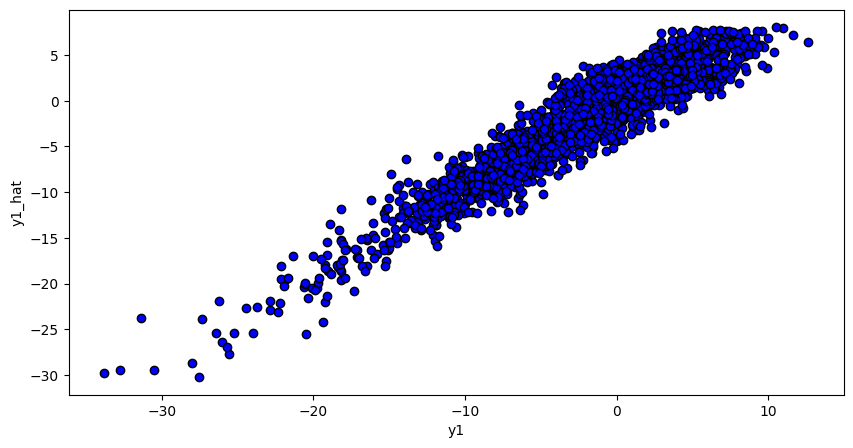

Pearson correlation coefficient: 
0.9635185121843558


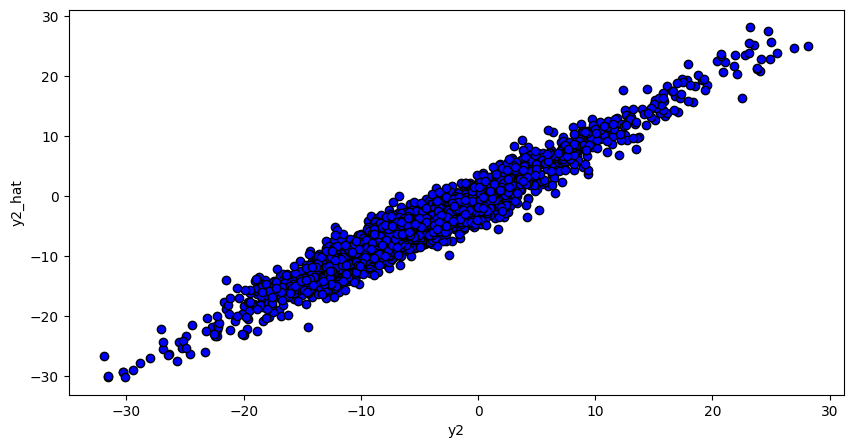

Pearson correlation coefficient: 
0.981180427459984


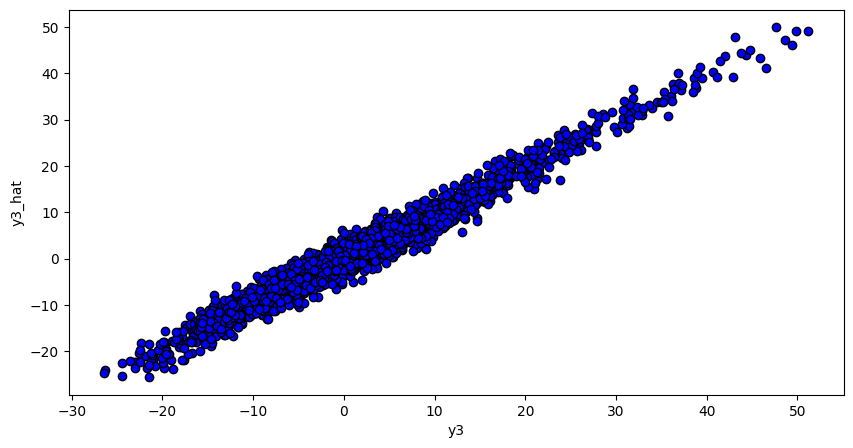

In [101]:
Y1_hat = np.dot(X_test_bias, W.T[0])
Y1 = Y_test_bias[:,0]
Y2_hat = np.dot(X_test_bias, W.T[1])
Y2 = Y_test_bias[:,1]
Y3_hat = np.dot(X_test_bias, W.T[2])
Y3 = Y_test_bias[:,2]

correlation_coefficient = np.corrcoef(Y1_hat, Y1)
print(f"Pearson correlation coefficient: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y1, Y1_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y1")
plt.ylabel("y1_hat")
plt.show()

correlation_coefficient = np.corrcoef(Y2_hat, Y2)
print(f"Pearson correlation coefficient: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y2, Y2_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y2")
plt.ylabel("y2_hat")
plt.show()

correlation_coefficient = np.corrcoef(Y3_hat, Y3)
print(f"Pearson correlation coefficient: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y3, Y3_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0]           )
plt.xlabel("y3")
plt.ylabel("y3_hat")

plt.show()

2.  Mean Squared Error

In [102]:
loss = 0
for i in range(n_tst):
  loss += np.linalg.norm(np.dot(X_test_bias[i], W)-Y_test_bias[i])**2
MS_loss = (loss/(3*n_tst))
print("Mean Square Error = ", MS_loss)

Mean Square Error =  4.1067275942927814


3. Mean Absolute Error

In [103]:
loss = 0
for i in range(n_tst):
  loss += np.sum(np.abs(np.dot(X_test_bias[i], W)-Y_test_bias[i]))
MA_loss = (loss/(3*n_tst))
print("Mean Absolute Error = ", MA_loss)

Mean Absolute Error =  1.6105791899727164


Therefore including ***bias term reduces loss***

**Note :** **bias weights will be zero if we perform normalization.**

In [104]:
# Train
ones = np.ones((n_trn, 1))
X_train_n = np.append(Data_train_n[:, :10], ones, axis=1)
Y_train_n = Data_train_n[:, 10:]
# Test
ones = np.ones((n_tst, 1))
X_test_n = np.append(Data_test_n[:, :10], ones, axis=1)
Y_test_n = Data_test_n[:, 10:]

In [105]:
W = np.dot(np.linalg.pinv(X_train_n.T).T, Y_train_n)
print("bias term weights :- ",W.T[:,10])
print("weights for features :- ")
print(W.T[:,:10])

bias term weights :-  [ 1.43065385e-05  4.85549215e-04 -5.16363353e-04]
weights for features :- 
[[ 0.11163538 -0.23407196 -0.64520728 -0.12332259 -0.40546072  0.37345751
  -0.07997037  0.08115907 -0.17927001 -0.13986575]
 [-0.05824082  0.07730947 -0.57544631  0.01235138 -0.15290586  0.33638131
  -0.13520786  0.39546621 -0.02042906  0.02102898]
 [ 0.39265644  0.01337559  0.07370991 -0.37309617  0.14152372 -0.09234359
  -0.04448826 -0.17890738  0.32769465  0.12755133]]


In [106]:
# Loss
loss = 0
for i in range(n_tst):
  loss += np.linalg.norm(np.dot(X_test_n[i], W)-Y_test_n[i])**2
RMS_loss = np.sqrt(loss/n_tst)
print("RMS loss = ", RMS_loss)

RMS loss =  0.45832185743412657


Here the loss reduced ***due to the normalization*** of data point by a factor.

####**Q2.  Generalised Regression with polynomial kernel**
---
---

######**Data Extraction**

In [71]:
data_path_2 = '/content/drive/MyDrive/PRNN assignment 1/Copy of regression_data_multiGen_group_25_train.txt'

In [72]:
# Load data from 'example4.txt' (assuming it contains string values)
Data_2 = np.genfromtxt(data_path_2, dtype=str, delimiter=",")

# labels of the data
column_labels = (Data_2[0]).split("\t")

# Extract data as integers, skipping the first line (column labels)
Data_2 = np.array([[float(x) for x in line.strip().split("\t")] for line in Data_2[1:]])

split = 0.8
Data_train = Data_2[:int(split*len(Data_2)),:]
n_trn , f_2 = Data_train.shape
Data_test = Data_2[int(split*len(Data_2)):,:]
n_tst , _ = Data_test.shape

print(column_labels)
print(Data_train.shape)
print(Data_test.shape)

# Normalization
# Calculate mean and standard deviation for each feature
mean_vals = Data_2.mean(axis=0)
std_vals = Data_2.std(axis=0)

# Normalize each feature using z-score
data_n = (Data_2 - mean_vals) / std_vals

Data_train_n = data_n[:int(split*len(Data_2)),:]
Data_test_n = data_n[int(split*len(Data_2)):,:]
n_trn_n = len(Data_train_n)
n_tst_n = len(Data_test_n)

['feat_1', 'feat_2', 'Y_1', 'Y_2', 'Y_3']
(11200, 5)
(2800, 5)


In [73]:
X_train = Data_train[:, :2]
Y_train = Data_train[:, 2:]
# quadratic terms
X_train = np.append(X_train, (X_train[:,0]**2).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, (X_train[:,1]**2).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, (X_train[:,0]*X_train[:,1]).reshape(n_trn, 1), axis=1)
# cubic terms
X_train = np.append(X_train, (X_train[:,0]**3).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, (X_train[:,1]**3).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, ((X_train[:,0]**2)*X_train[:,1]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, ((X_train[:,1]**2)*X_train[:,0]).reshape(n_trn, 1), axis=1)
# Bi-quadratic terms
# X_train = np.append(X_train, (X_train[:,0]**4).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, (X_train[:,1]**4).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, ((X_train[:,0]**2)*(X_train[:,1]**2)).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, ((X_train[:,0]**3)*X_train[:,1]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, (X_train[:,0]*(X_train[:,1]**3)).reshape(n_trn, 1), axis=1)
ones = np.ones((n_trn, 1))
X_train = np.append(X_train, ones, axis=1)
print("train data dimensin = ", X_train.shape)
X_test = Data_test[:, :2]
Y_test = Data_test[:, 2:]
# quadratic terms
X_test = np.append(X_test, (X_test[:,0]**2).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, (X_test[:,1]**2).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, (X_test[:,0]*X_test[:,1]).reshape(n_tst, 1), axis=1)
# cubic terms
X_test = np.append(X_test, (X_test[:,0]**3).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, (X_test[:,1]**3).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, ((X_test[:,0]**2)*X_test[:,1]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, ((X_test[:,1]**2)*X_test[:,0]).reshape(n_tst, 1), axis=1)
# Bi-quadratic terms
# X_test = np.append(X_test, (X_test[:,0]**4).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, (X_test[:,1]**4).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, ((X_test[:,0]**2)*(X_test[:,1]**2)).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, ((X_test[:,0]**3)*X_test[:,1]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, (X_test[:,0]*(X_test[:,1]**3)).reshape(n_tst, 1), axis=1)
ones = np.ones((n_tst, 1))
X_test = np.append(X_test, ones, axis=1)
print("test data dimensin = ", X_test.shape)

train data dimensin =  (11200, 11)
test data dimensin =  (2800, 11)


###### **Solution**

In [74]:
W = np.dot(np.linalg.pinv(X_train.T).T, Y_train)

In [75]:
print("bias term weights :- ",W.T[:,-1])
print("weights for features :- ")
print(W.T[:,:-1])

bias term weights :-  [ 3.65704343 -3.90570395 -1.24395545]
weights for features :- 
[[ 0.80158886 -0.88851371 -2.17283167 -3.77247161 -0.66204856 -3.13982253
   1.82640357  0.57642241 -1.27652214 -1.0269229 ]
 [-0.51046245  0.10862343  0.87598336 -1.73655208 -1.36630964 -3.41819739
   2.00804716  3.42846443 -0.17756429  0.18846516]
 [ 4.89037314 -4.66253091  0.21536193  2.28394628 -0.63883039  0.62217302
  -0.7833246  -2.2039994   4.04733824  1.62439213]]


######**Evaluation**

Pearson correlation coefficient for y1: 
0.9448285876119296


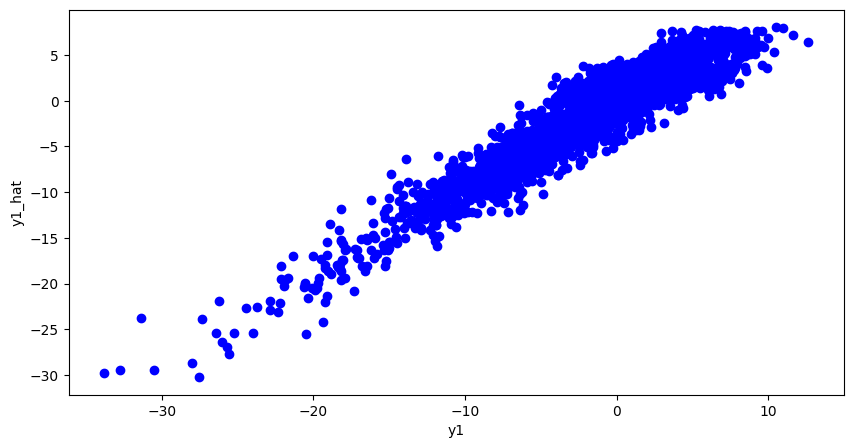

Pearson correlation coefficient for y2: 
0.9635185121843559


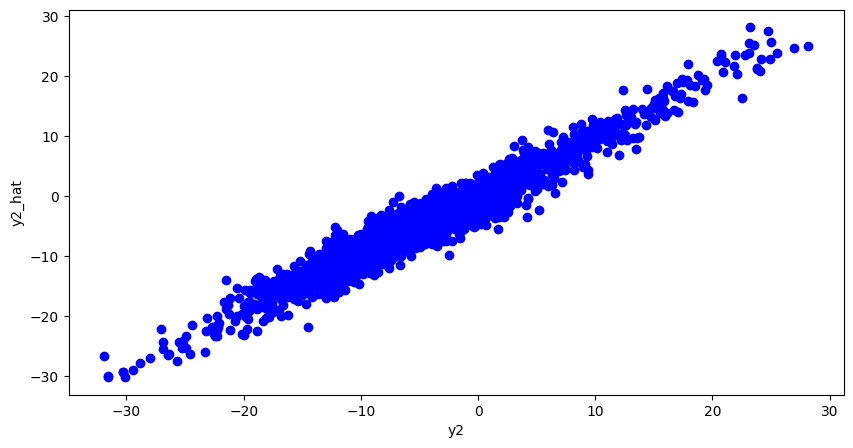

Pearson correlation coefficient for y3: 
0.981180427459984


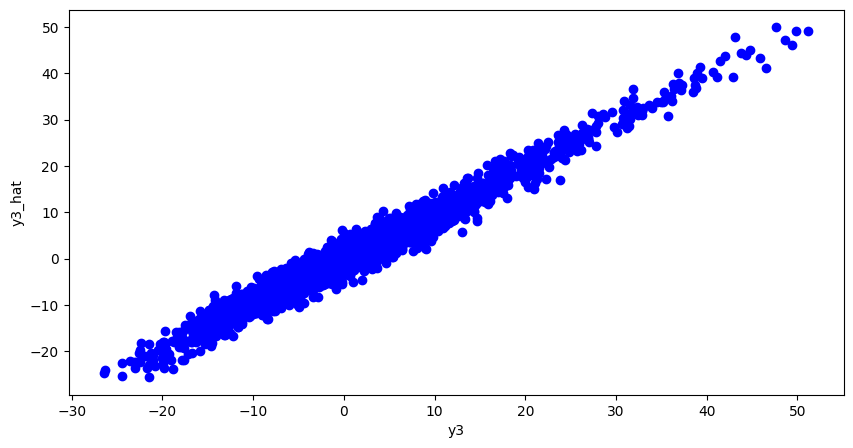

In [76]:
Y1_hat = np.dot(X_test, W.T[0])
Y1 = Y_test[:,0]
Y2_hat = np.dot(X_test, W.T[1])
Y2 = Y_test[:,1]
Y3_hat = np.dot(X_test, W.T[2])
Y3 = Y_test[:,2]

correlation_coefficient = np.corrcoef(Y1_hat, Y1)
print(f"Pearson correlation coefficient for y1: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y1, Y1_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y1")
plt.ylabel("y1_hat")
plt.show()

correlation_coefficient = np.corrcoef(Y2_hat, Y2)
print(f"Pearson correlation coefficient for y2: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y2, Y2_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y2")
plt.ylabel("y2_hat")
plt.show()

correlation_coefficient = np.corrcoef(Y3_hat, Y3)
print(f"Pearson correlation coefficient for y3: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y3, Y3_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y3")
plt.ylabel("y3_hat")

plt.show()

In [77]:
loss = 0
for i in range(n_tst):
  loss += np.linalg.norm(np.dot(X_test[i], W)-Y_test[i])**2
MS_loss = (loss/(3*n_tst))
print("Root Mean Square Error = ", MS_loss)

Root Mean Square Error =  4.1067275942927814


loss without polynomial terms = 7.3510648225910105

loss with all quadratic terms = 5.618834132031067

loss with all cubic terms = 6.009893296263616

loss with all quadratic and cubic terms = 3.647347606543249

loss with all quadratic, cubic & biquadratic terms = 3.5113517890265444

loss with quadratic ( all terms ), cubic terms ( all terms ) & biquadratic ( only ($x_{1}^{2}*x_{2}^{2}$) term ) ( only reducing lower weighted terms ) = 3.510011792413003

####**Q3 Generalised Regression with non-polynomial kernel**
---
---

######**Data Extraction**

In [84]:
data_path_3 = '/content/drive/MyDrive/PRNN assignment 1/Copy of regression_data_uni_group_25_train.txt'

In [85]:
def sigmoid(t):
  val = 1 + np.exp(-t);
  return 1/val;

In [86]:
# Load data from 'example4.txt' (assuming it contains string values)
Data_3 = np.genfromtxt(data_path_3, dtype=str, delimiter=",")

# labels of the data
column_labels = (Data_3[0]).split("\t")

# Extract data as integers, skipping the first line (column labels)
Data_3 = np.array([[float(x) for x in line.strip().split("\t")] for line in Data_3[1:]])

split = 0.9
Data_train = Data_3[:int(split*len(Data_3)),:]
n_trn , f_2 = Data_train.shape
Data_test = Data_3[int(split*len(Data_3)):,:]
n_tst , _ = Data_test.shape

print(column_labels)
print(Data_train.shape)
print(Data_test.shape)

# Normalization
# Calculate mean and standard deviation for each feature
mean_vals = Data_3.mean(axis=0)
std_vals = Data_3.std(axis=0)

# Normalize each feature using z-score
data_n = (Data_3 - mean_vals) / std_vals

Data_train_n = data_n[:int(split*len(Data_3)),:]
Data_test_n = data_n[int(split*len(Data_3)):,:]
n_trn_n = len(Data_train_n)
n_tst_n = len(Data_test_n)

['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'y']
(6300, 6)
(700, 6)


In [87]:
# exp(1,2), sin(1,2,5), cos(0)

# Train data
# implimenting sigmoid by inverting y
Y_train = np.log(Data_train[:, 5]) - np.log(1 - Data_train[:, 5])
X_train = np.ones((n_trn, 1))

# linear
X_train = np.append(X_train, Data_train[:, 0].reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, Data_train[:, 1].reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, Data_train[:, 2].reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, Data_train[:, 3].reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, Data_train[:, 4].reshape(n_trn, 1), axis=1)
# Sinosoidal terms
X_train = np.append(X_train, np.tanh(Data_train[:,0]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, np.tanh(Data_train[:,1]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, np.tanh(Data_train[:,2]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, np.tanh(Data_train[:,3]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, np.tanh(Data_train[:,4]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,0]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,1]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,2]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,3]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,4]).reshape(n_trn, 1), axis=1)
# bias
# X_train = np.append(X_train, np.ones((n_trn, 1)), axis=1)

###############################################################################

# Test data
Y_test = np.log(Data_test[:, 5]) - np.log(1 - Data_test[:, 5])
X_test = np.ones((n_tst, 1))

# linear
X_test = np.append(X_test, Data_test[:, 0].reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, Data_test[:, 1].reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, Data_test[:, 2].reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, Data_test[:, 3].reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, Data_test[:, 4].reshape(n_tst, 1), axis=1)
# tanh
X_test = np.append(X_test, np.tanh(Data_test[:,0]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, np.tanh(Data_test[:,1]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, np.tanh(Data_test[:,2]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, np.tanh(Data_test[:,3]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, np.tanh(Data_test[:,4]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,0]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,1]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,2]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,3]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,4]).reshape(n_tst, 1), axis=1)
# bias
# X_test = np.append(X_test, np.ones((n_tst, 1)), axis=1)

f = X_train.shape[1]
print("train data shape = {}, train output data shape = {}".format(X_train.shape, Y_train.shape))
print("test data shape = {}, test output data shape = {}".format(X_test.shape, Y_test.shape))

train data shape = (6300, 11), train output data shape = (6300,)
test data shape = (700, 11), test output data shape = (700,)


######**Solution**

In [88]:
# regularizer
l = 0
W = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)+l*np.eye(f)), X_train.T), Y_train)

In [89]:
print("bias term weights :- ",W.T[-1])
print("weights for features :- ")
print(W.T[:-1])

bias term weights :-  0.5879052568387548
weights for features :- 
[-2.15984176e+00  3.37334890e+01  1.13160920e+02  5.28599545e+00
  8.76045494e+00 -2.58400139e+00 -2.12565757e+02  4.17121656e+01
  5.45206285e-03 -1.27433604e+01]


######**Evaluation**

(700,) (700,)
Pearson correlation coefficient for y1: 
0.8814486844492658


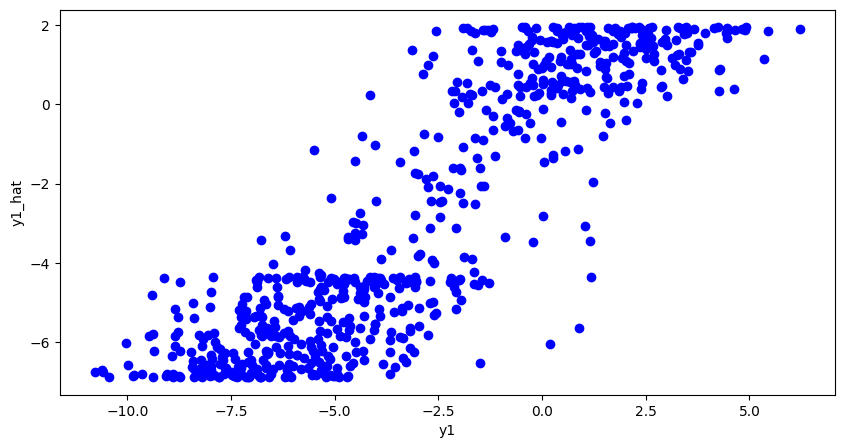

In [90]:
Y1_hat = np.dot(X_test, W.T)
Y1 = Y_test

print(Y1.shape, Y1_hat.shape)
correlation_coefficient = np.corrcoef(Y1_hat, Y1)
print(f"Pearson correlation coefficient for y1: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y1, Y1_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y1")
plt.ylabel("y1_hat")
plt.show()

In [91]:
loss = 0
for i in range(n_tst):
  loss += (np.dot(X_test[i], W)-Y_test[i])**2
MS_loss = (loss/(3*n_tst))
print("Root Mean Square Error = ", MS_loss)

Root Mean Square Error =  1.04391650562155


##**CLASSIFICATION TASK**

#### **Q4 Binary Classification**
---
---

##### **Data Extraction**

In [ ]:
import numpy as np;
import matplotlib.pyplot as plt

In [ ]:
filename = "/content/drive/MyDrive/PRNN assignment 1/Q4 data.txt"
# filename = "/content/drive/MyDrive/Q4_multi_class_classification_data_group_25_train.txt"  #Aditya filePath
# filename = "/content/drive/MyDrive/Q4_multi_class_classification_data_group_25_train.txt"  #KrishanuDa filePath

data = [];
with open(filename, "r") as f:
  for line in f:
    data_points = line.split();
    data.append(data_points);
data.pop(0);

In [ ]:
X = [];
Y = [];

for datum in data:
  float_datum = [float(d) for d in datum];

  x = float_datum[0:10];
  y = float_datum[-1];
  # x += [1.0];
  X.append(x);
  Y.append(y);

X = np.array(X);
Y = np.array(Y);
N= len(X);

In [ ]:
split = 0.8;

X_test = X[int(split*N):, :]
Y_test = Y[int(split*N):]

X = X[:int(split*N), :]
Y = Y[:int(split*N)]
N = len(X)

N_test = len(X_test)

print("Shape of train data: ", X.shape)
print("Shape of test label: ", X_test.shape)
print("Shape of train label: ", Y.shape);
print("Shape of test label: ", Y_test.shape);

Shape of train data:  (11200, 10)
Shape of test label:  (2800, 10)
Shape of train label:  (11200,)
Shape of test label:  (2800,)


#####**Assuming Normal**

######**Training**

In [ ]:
#Calculate the class priors
N = len(X);
count_1 = np.count_nonzero(Y == 1.0);
count_0 = np.count_nonzero(Y == 0.0);

pi = 1 - count_0 / N;
print("Probability that y = 0 is ", pi);

Probability that y = 0 is  0.49687499999999996


In [ ]:
# data is d dimensional
d = len(X[0]);

temp_x_vect_0 = np.zeros((d,), float);
temp_x_vect_1 = np.zeros((d,), float);
temp_x_vect_0 = np.sum(X[np.where(Y==0)], axis = 0)
temp_x_vect_1 = np.sum(X[np.where(Y==1)], axis = 0)

m_0 = temp_x_vect_0 / count_0;
m_1 = temp_x_vect_1 / count_1;

print("mean for P(x|y=0) = ", m_0);
print("mean for P(x|y=1) = ", m_1);

mean for P(x|y=0) =  [0.53625777 0.45168639 0.73773566 0.45492446 0.43521628 0.43066979
 0.40061611 0.47638605 0.77283869 0.53965816]
mean for P(x|y=1) =  [0.43729864 0.61596032 0.37774133 0.33112324 0.49598626 0.48284085
 0.57976422 0.22426287 0.33436646 0.37991917]


In [ ]:
#Calculate covariance matrix sigma

S_0 = np.dot((X[np.where(Y==0)]-m_0).T, (X[np.where(Y==0)]-m_0))
S_1 = np.dot((X[np.where(Y==1)]-m_1).T, (X[np.where(Y==1)]-m_1))
S = (S_0 + S_1) / N;

# for i in range(N):

#   x = X[i];
#   y = Y[i];

#   if(y == 0):
#     x_m0 = x - m_0;
#     S_0 += np.outer( x_m0, np.transpose(x_m0) );
#   else:
#     x_m1 = x - m_1;
#     S_1 += np.outer( x_m1, np.transpose(x_m1) );

# S = (S_0 + S_1) / N;



######**Evaluation**

In [ ]:
# Create a list of assigned(predicted) classes
h_X = [];   # the list of predicted classes, h_X[i] = h(x_i)
S_inv = np.linalg.inv(S);

for x in X_test:

  val_0 = (-1/2)*( np.transpose(x - m_1) @ S_inv @ (x - m_1) ) - np.log(1-pi);
  val_1 = (-1/2)*( np.transpose(x - m_0) @ S_inv @ (x - m_0) ) - np.log(pi);

  if(val_1 >= val_0):
    h_X.append(1);
  else:
    h_X.append(0);

In [ ]:
#Calculate TP, TN, FP, FN

TP = np.zeros(2, dtype = float);
TN = np.zeros(2, dtype = float);
FP = np.zeros(2, dtype = float);
FN = np.zeros(2, dtype = float);

for i in range(N_test):

  if(Y_test[i] == 0 and h_X[i] == 0):
    TP[0] += 1.0;
    TN[1] += 1.0;
  if(Y_test[i] == 0 and h_X[i] != 0):
    FN[0] += 1.0;
    FP[1] += 1.0;

  if(Y_test[i] == 1 and h_X[i] == 1):
    TP[1] += 1.0;
    TN[0] += 1.0;
  if(Y_test[i] == 1 and h_X[i] != 0):
    FN[1] += 1.0;
    FP[0] += 1.0;

In [ ]:
Confusion_Matrix = np.array([[[TP[0], TN[0]],
                             [FP[0], FN[0]]],
                             [[TP[1], TN[1]],
                              [FP[1], FN[1]]]]);
print("Confusion Matrix for class 0 \n",Confusion_Matrix[0]);
print("\nConfusion Matrix for class 1 \n",Confusion_Matrix[1]);

Confusion Matrix for class 0 
 [[966. 930.]
 [930. 475.]]

Confusion Matrix for class 1 
 [[930. 966.]
 [475. 930.]]


In [ ]:
accu = (TP + TN) / (TP + TN + FP + FN);
f1_score = (2 * TP) / (2 * TP + FP + FN);

for c in range(2):
  print("For class ", c, "\n");
  print("Accuracy = ", accu[c]);
  print("F1 score = ", f1_score[c]);
  if(c == 0):
    for _ in range(100):
      print("_", end = '');
    print("\n");

For class  0 

Accuracy =  0.5743714026052711
F1 score =  0.5789631405454001
____________________________________________________________________________________________________

For class  1 

Accuracy =  0.5743714026052711
F1 score =  0.5696784073506891


#####**Assuming GMM**

In [ ]:
#Calculate the class priors
N = len(X);
count_0 = np.count_nonzero(Y == 0.0);
count_1 = np.count_nonzero(Y == 1.0);

pi_0 = count_0 / N;
pi_1 = count_1 / N;
print("Probability that y = 0 is ", pi_0);

Probability that y = 0 is  0.503125


In [ ]:
def get_gaussian(x, m, S):

  d = len(x);
  S_inv = np.zeros(len(S), dtype = float);

  det = 1.0;
  for i in range(d):
    det *= S[i];
    S_inv[i] = 1.0 / S[i];

  det = np.sqrt(det);

  exponent = 0.0;
  x = x - m;

  for i in range(d):
    exponent += (((x - m)[i]) ** 2) * S_inv[i];

  return (1.0 / det) * np.exp(-exponent);

In [ ]:
def get_log_likelihood(X, N, K, m, S, p):

  ln_p = 0.0;

  for n in range(N):

    inner_sum = 0.0;
    for k in range(K):
      inner_sum += p[k] * get_gaussian(X[n], m[k], S[k]);

    ln_p += np.log(inner_sum);

  return ln_p;

In [ ]:
def perform_EM(X, m, S, pi):

  N = len(X);
  d = len(X[0]);
  K = len(m);
  gamma = np.zeros((N, K), dtype = float);
  N_list = np.zeros(K, dtype = float);

  #E-step
  for n in range(N):

    for k in range(K):
      gamma[n][k] = pi[k] * get_gaussian(X[n], m[k], S[k]);
    gamma[n] /= sum(gamma[n]);

  #Calcuate N_k values
  for k in range(K):

    temp_sum = 0.0;
    for n in range(N):
      temp_sum += gamma[n][k];
    N_list[k] = temp_sum;

  #M-step
  for k in range(K):

    sum_gamma_x = np.zeros(d, dtype = float);
    for n in range(N):
      sum_gamma_x += (X[n] * gamma[n][k]);
    m[k] = sum_gamma_x / N_list[k];

    sum_for_sigma = np.zeros(d, dtype = float);
    for n in range(N):
      sum_for_sigma += np.array([(X[n][i] - m[k][i])**2 for i in range(d)]);
      pi[k] = N_list[k] / N;
    S[k] = sum_for_sigma / N_list[k];

  return m, S, pi;

In [ ]:
X_0 = [];
X_1 = [];

for i in range(N):
  if(Y[i] == 0):
    X_0.append(X[i]);
  else:
    X_1.append(X[i]);

In [ ]:
N_0 = len(X_0);
N_1 = len(X_1);

In [ ]:
def get_MSP_0(X_0, K):
  #Considering 10 gaussians (m[0 ... 9], S[0 ... 9])
    K = 10;
    #Each element of list S is a dxd numpy matrix.
    d = len(X[0]); #dimension of feature

    m_0 = np.zeros((K, d), dtype = float);
    S_0 = np.ones((K, d), dtype = float);
    p_0 = np.ones(K, dtype = float) / K;



    prev_log_likelihood = get_log_likelihood(X_0, N_0, K, m_0, S_0, p_0);
    #EM algo starts
    m_0, S_0, p_0 = perform_EM(X_0, m_0, S_0, p_0);
    new_log_likelihood = get_log_likelihood(X_0, N_0, K, m_0, S_0, p_0);

    iter_num = 1;
    while(abs(new_log_likelihood - prev_log_likelihood) > 0.005):

      prev_log_likelihood = new_log_likelihood;
      m_0, S_0, p_0 = perform_EM(X_0, m_0, S_0, p_0);
      new_log_likelihood = get_log_likelihood(X_0, N_0, K, m_0, S_0, p_0);

    return m_0, S_0, p_0;

In [ ]:
def get_MSP_1(X_1, K):
  #Considering 10 gaussians (m[0 ... 9], S[0 ... 9])
  K = 10;
  #Each element of list S is a dxd numpy matrix.
  d = len(X[0]); #dimension of feature

  m_1 = np.zeros((K, d), dtype = float);
  S_1 = np.ones((K, d), dtype = float);
  p_1 = np.ones(K, dtype = float) / K;



  prev_log_likelihood = get_log_likelihood(X_1, N_1, K, m_1, S_1, p_1);
  #EM algo starts
  m_1, S_1, p_1 = perform_EM(X_1, m_1, S_1, p_1);
  new_log_likelihood = get_log_likelihood(X_1, N_1, K, m_1, S_1, p_1);

  iter_num = 1;
  while(abs(new_log_likelihood - prev_log_likelihood) > 0.005):

    prev_log_likelihood = new_log_likelihood;
    m_1, S_1, p_1 = perform_EM(X_1, m_1, S_1, p_1);
    new_log_likelihood = get_log_likelihood(X_1, N_1, K, m_1, S_1, p_1);

  return m_1, S_1, p_1;

In [ ]:
def get_hX(m_0, m_1, S_0, S_1):

  h_X = [];

  for i in range(N_test):

    x = X_test[i];
    y = Y_test[i];

    val_0 = 0.0;
    val_1 = 0.0;
    for k in range(K):
      val_0 += p_0[k] * get_gaussian(x, m_0[k], S_0[k]);

    for k in range(K):
      val_1 += p_1[k] * get_gaussian(x, m_1[k], S_1[k]);

    if(val_0 * pi_0 >= val_1 * pi_1):
      h_X.append(0);
    else:
      h_X.append(1);

  return h_X;

In [ ]:
#Calculate TP, TN, FP, FN
def print_scores(h_X, Y_test):

  TP = np.zeros(2, dtype = float);
  TN = np.zeros(2, dtype = float);
  FP = np.zeros(2, dtype = float);
  FN = np.zeros(2, dtype = float);
  N_test = len(Y_test);

  for i in range(N_test):

    if(Y_test[i] == 0 and h_X[i] == 0):
      TP[0] += 1.0;
      TN[1] += 1.0;
    if(Y_test[i] == 0 and h_X[i] != 0):
      FN[0] += 1.0;
      FP[1] += 1.0;

    if(Y_test[i] == 1 and h_X[i] == 1):
      TP[1] += 1.0;
      TN[0] += 1.0;
    if(Y_test[i] == 1 and h_X[i] != 0):
      FN[1] += 1.0;
      FP[0] += 1.0;


  Confusion_Matrix = np.array([[[TP[0], TN[0]],
                              [FP[0], FN[0]]],

                              [[TP[1], TN[1]],
                                [FP[1], FN[1]]]]);
  print("Confusion Matrix for class 0 \n",Confusion_Matrix[0]);
  print("\nConfusion Matrix for class 1 \n",Confusion_Matrix[1]);

  accuracy = np.zeros(2, dtype = float);
  f1_score = np.zeros(2, dtype = float);

  accuracy = (TP + TN) / (TP + TN + FN + FP);
  f1_score = (2 * TP) / (2 * TP + FP + FN);

  print("\nAccuracy for class 0 :", accuracy[0]);
  print("F1 Score for class 0 :", f1_score[0]);
  print("Accuracy for class 1 :", accuracy[1]);
  print("F1 Score for class 1 :", f1_score[1]);

In [ ]:
No_of_K = 8;
M = [];
S = [];
P = [];

for k in range(2, 2 + No_of_K):
  m_0, s_0, p_0 = get_MSP_0(X_0, k);
  m_1, s_1, p_1 = get_MSP_1(X_1, k);

  h_X = get_hX(m_0, m_1, s_0, s_1);
  for _ in range(100):
    print("_", end = '');

  print("\nFor ",k, "Gaussians :\n");
  print_scores(h_X, Y_test);

____________________________________________________________________________________________________
For  2 Gaussians :

Confusion Matrix for class 0 
 [[ 255. 1329.]
 [1329. 1186.]]

Confusion Matrix for class 1 
 [[1329.  255.]
 [1186. 1329.]]
Accuracy for class 0 : 0.38643571602829957
F1 Score for class 0 : 0.16859504132231404
Accuracy for class 1 : 0.38643571602829957
F1 Score for class 1 : 0.5138217668664218
____________________________________________________________________________________________________
For  3 Gaussians :

Confusion Matrix for class 0 
 [[ 255. 1329.]
 [1329. 1186.]]

Confusion Matrix for class 1 
 [[1329.  255.]
 [1186. 1329.]]
Accuracy for class 0 : 0.38643571602829957
F1 Score for class 0 : 0.16859504132231404
Accuracy for class 1 : 0.38643571602829957
F1 Score for class 1 : 0.5138217668664218
____________________________________________________________________________________________________
For  4 Gaussians :

Confusion Matrix for class 0 
 [[ 255. 1329.]

#####**Using Parzen Window**

In [ ]:
#Calculate the class priors
N = len(X);
count_0 = np.count_nonzero(Y == 0.0);
count_1 = np.count_nonzero(Y == 1.0);

pi_0 = count_0 / N;
pi_1 = count_1 / N;
print("Probability that y = 0 is ", pi_0);

Probability that y = 0 is  0.5034821428571429


In [ ]:
X_0 = [];
X_1 = [];
for i in range(N):
  if(Y[i] == 0):
    X_0.append(X[i]);
  else:
    X_1.append(X[i]);

X_0 = np.array(X_0[5000:]);
X_1 = np.array(X_1[5000:]);

In [ ]:
def get_class(x, X_0, X_1, pi_0, pi_1, h):

  sum_0 = 0.0;
  sum_1 = 0.0;

  for x_n in X_0:
    sum_0 += (np.linalg.norm( x - x_n ))**2

  for x_n in X_1:
    sum_1 += (np.linalg.norm( x - x_n) )**2;

  val_0 = (2 * (h**2) * np.log(pi_0)) - sum_0;
  val_1 = (2 * (h**2) * np.log(pi_1)) - sum_1;

  if(val_0 >= val_1):
    return 0;
  else:
    return 1;

In [ ]:
#For two windows of side length h1 and h2

h1 = 0.03;
h2 = 0.5;

h1_X = [];
h2_X = [];

for i in range(N_test):
  x = X_test[i];

  h1_X.append(get_class(x, X_0, X_1, pi_0, pi_1, h1));
  h2_X.append(get_class(x, X_0, X_1, pi_0, pi_1, h2));

In [ ]:
TP = np.zeros(2, dtype = float);
TN = np.zeros(2, dtype = float);
FP = np.zeros(2, dtype = float);
FN = np.zeros(2, dtype = float);

In [ ]:
for i in range(N_test):
  if(Y_test[i] == 0 and h1_X[i] == 0):
    TP[0] += 1;
    TN[1] += 1;
  if(Y_test[i] == 0 and h1_X[i] != 0):
    FN[0] += 1;
    FP[1] += 1;

  if(Y_test[i] == 1 and h1_X[i] == 1):
    TP[1] += 1;
    TN[0] += 1;
  if(Y_test[i] == 1 and h1_X[i] != 1):
    FN[1] += 1;
    FP[0] += 1;

accuracy = 100*(TP + TN) / (TP + TN + FP + FN);
f1_score = (2*TP) / (2*TP + FP + FN);

print("Using h = ", h1, "\n");

print("For class 0 :\n");
print("Accuracy is ", accuracy[0], "%");
print("f1_score is ", f1_score[0]);

print("For class 1 :\n");
print("Accuracy is ", accuracy[1], "%");
print("f1_score is ", f1_score[1]);

for _ in range(100):
  print("_", end = '');
print("\n");
#-------------------------------------------
for i in range(N_test):
  if(Y_test[i] == 0 and h2_X[i] == 0):
    TP[0] += 1;
    TN[1] += 1;
  if(Y_test[i] == 0 and h2_X[i] != 0):
    FN[0] += 1;
    FP[1] += 1;

  if(Y_test[i] == 1 and h2_X[i] == 1):
    TP[1] += 1;
    TN[0] += 1;
  if(Y_test[i] == 1 and h2_X[i] != 1):
    FN[1] += 1;
    FP[0] += 1;

accuracy = 100*(TP + TN) / (TP + TN + FP + FN);
f1_score = (2*TP) / (2*TP + FP + FN);

print("Using h = ", h2, "\n");

print("For class 0 :\n");
print("Accuracy is ", accuracy[0], "%");
print("f1_score is ", f1_score[0]);

print("For class 1 :\n");
print("Accuracy is ", accuracy[1], "%");
print("f1_score is ", f1_score[1]);

Using h =  0.03 

For class 0 :

Accuracy is  63.07142857142857 %
f1_score is  0.5248161764705882
For class 1 :

Accuracy is  63.07142857142857 %
f1_score is  0.6980140186915887
____________________________________________________________________________________________________

Using h =  0.5 

For class 0 :

Accuracy is  63.07142857142857 %
f1_score is  0.5248161764705882
For class 1 :

Accuracy is  63.07142857142857 %
f1_score is  0.6980140186915887


#####**Using K-Nearest Neighbour**

In [ ]:
#Calculate the class priors
N = len(X);
count_0 = np.count_nonzero(Y[0:5000] == 0.0);
count_1 = np.count_nonzero(Y[0:5000] == 1.0);

pi_0 = count_0 / 5000;
pi_1 = count_1 / 5000;
print("Probability that y = 0 is ", pi_0);

Probability that y = 0 is  0.4984


In [ ]:
def get_class_KNN(x, X, Y, K):

  Y_temp = np.zeros(len(Y), dtype = float);
  dist_list = np.zeros(len(Y), dtype = float);
  N = len(Y);
  list_of_K_min = [];

  for i in range(N):
    Y_temp[i] = Y[i];
    dist_list[i] = np.linalg.norm(X[i] - x);

  count_class_0 = 0;
  count_class_1 = 0;

  for i in range(K+1):
    min_index = np.argmin(dist_list[i:]);
    list_of_K_min.append((dist_list[min_index+i], Y_temp[i]));
    dist_list[min_index+i] , dist_list[i] = dist_list[i], dist_list[min_index+i];
    Y_temp[min_index+i], Y[i] = Y_temp[i], Y_temp[min_index+i];

  for elem in list_of_K_min:
    (dis, clas) = elem;
    if(clas == 0):
      count_class_0 += 1;
    else:
      count_class_1 += 1;

  if(count_class_0 >= count_class_1):
    return 0;
  else:
    return 1;


In [ ]:
#Taking two values for K
K1 = 5;
K2 = 20;

h_X_K1 = [];
h_X_K2 = [];

for i in range(N_test):
  h_X_K1.append(get_class_KNN(X_test[i], X[:5000], Y[:5000], K1));
  h_X_K2.append(get_class_KNN(X_test[i], X[:5000], Y[:5000], K2));

In [ ]:
TP = np.zeros(2, dtype = float);
TN = np.zeros(2, dtype = float);
FP = np.zeros(2, dtype = float);
FN = np.zeros(2, dtype = float);

In [ ]:
for i in range(N_test):
  if(Y_test[i] == 0 and h_X_K1[i] == 0):
    TP[0] += 1;
    TN[1] += 1;
  if(Y_test[i] == 0 and h_X_K1[i] != 0):
    FN[0] += 1;
    FP[1] += 1;

  if(Y_test[i] == 1 and h_X_K1[i] == 1):
    TP[1] += 1;
    TN[0] += 1;
  if(Y_test[i] == 1 and h_X_K1[i] != 1):
    FN[1] += 1;
    FP[0] += 1;

accuracy = 100*(TP + TN) / (TP + TN + FP + FN);
f1_score = (2*TP) / (2*TP + FP + FN);

print("Using K = ", K1, "\n");

print("For class 0 :\n");
print("Accuracy is ", accuracy[0], "%");
print("f1_score is ", f1_score[0]);

print("For class 1 :\n");
print("Accuracy is ", accuracy[1], "%");
print("f1_score is ", f1_score[1]);

for _ in range(100):
  print("_", end = '');
print("\n");
#-------------------------------------------
for i in range(N_test):
  if(Y_test[i] == 0 and h_X_K2[i] == 0):
    TP[0] += 1;
    TN[1] += 1;
  if(Y_test[i] == 0 and h_X_K2[i] != 0):
    FN[0] += 1;
    FP[1] += 1;

  if(Y_test[i] == 1 and h_X_K2[i] == 1):
    TP[1] += 1;
    TN[0] += 1;
  if(Y_test[i] == 1 and h_X_K2[i] != 1):
    FN[1] += 1;
    FP[0] += 1;

accuracy = 100*(TP + TN) / (TP + TN + FP + FN);
f1_score = (2*TP) / (2*TP + FP + FN);

print("Using K = ", K2, "\n");

print("For class 0 :\n");
print("Accuracy is ", accuracy[0], "%");
print("f1_score is ", f1_score[0]);

print("For class 1 :\n");
print("Accuracy is ", accuracy[1], "%");
print("f1_score is ", f1_score[1]);

Using K =  5 

For class 0 :

Accuracy is  49.5 %
f1_score is  0.5251846877098724
For class 1 :

Accuracy is  49.5 %
f1_score is  0.4607170099160946
____________________________________________________________________________________________________

Using K =  20 

For class 0 :

Accuracy is  53.0 %
f1_score is  0.538083538083538
For class 1 :

Accuracy is  53.0 %
f1_score is  0.5216284987277354


#####**Using Linear Classifier (W-transpose X + W_0)**

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def logistic_regression(X, Y, learning_rate, num_iters):

  d = len(X[0]);
  theta = np.zeros(d, dtype = float);

  for _ in range(num_iters):
    predicted_prob = sigmoid(np.dot(X, theta))

    gradient = np.dot(X.T, (predicted_prob - Y))

    theta -= learning_rate * gradient

  return theta

In [ ]:
learning_rate = 0.00001
num_iters = 50000

theta = logistic_regression(X, Y, learning_rate, num_iters)


Gradient is  8.009157879131287e-12


In [ ]:
def get_hX_linear_bin(theta, threshold):

  h_X_W = [];
  for i in range(N_test):

    val = sigmoid(np.dot(X_test[i], theta));

    if(val < threshold):
      h_X_W.append(0);
    else:
      h_X_W.append(1);

  return h_X_W

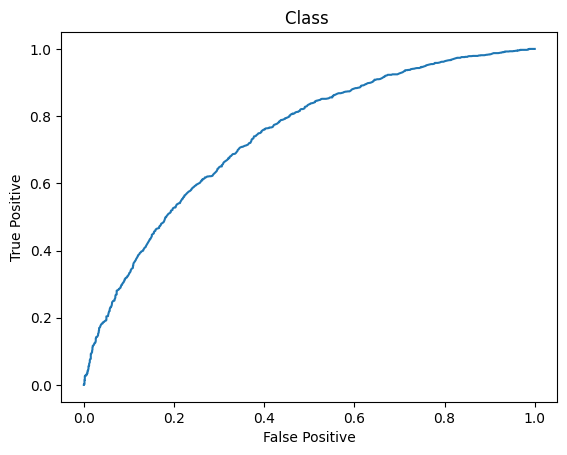

In [ ]:
True_Pos_list = [];
False_Pos_list = [];

for threshold in range(0, 1000, 1):

  Confusion_Matrix = np.zeros((2, 2), dtype = int);
  h_X_W = get_hX_linear_bin(theta, float(threshold / 1000.0));

  for i in range(N_test):
    actual_class_linear_bin = int(Y_test[i]);
    predicted_class_linear_bin = h_X_W[i];

    Confusion_Matrix[actual_class_linear_bin][predicted_class_linear_bin] += 1;

  TP = Confusion_Matrix[0, 0]
  FP = Confusion_Matrix[1, 0]
  TN = Confusion_Matrix[1, 1]
  FN = Confusion_Matrix[0, 1]

  # Calculate TPR and FPR
  TPR = TP / (TP + FN)
  FPR = FP / (FP + TN)
  True_Pos_list.append(TPR);
  False_Pos_list.append(FPR);

plt.plot(False_Pos_list, True_Pos_list);
plt.ylabel('True Positive');
plt.xlabel('False Positive');
plt.title("Class ");
plt.show();

In [ ]:
Confusion_Matrix = np.array([[   [TP[0], TN[0]],
                                [FP[0], FN[0]]],

                            [   [TP[1], TN[1]],
                                [FP[1], FN[1]]  ]]);

accuracy = (TP + TN) / (TP + TN + FP + FN);
f1_score = (2 * TP) / (2 * TP + FP + FN);

In [ ]:
print("For class 0 \n");
print(Confusion_Matrix[0]);
print("Accuracy = ", accuracy[0]);
print("F1-score = ", f1_score[0]);

print("\n\nFor class 1 \n");
print(Confusion_Matrix[1]);
print("Accuracy = ", accuracy[1]);
print("F1-score = ", f1_score[1]);

For class 0 

[[1395.   39.]
 [1320.   46.]]
Accuracy =  0.5121428571428571
F1-score =  0.6713185755534168


For class 1 

[[  39. 1395.]
 [  46. 1320.]]
Accuracy =  0.5121428571428571
F1-score =  0.054016620498614956


#### **Q5 Multi-Class Classification**
---
---

#####**Data Extraction**

In [47]:
import numpy as np;
import matplotlib.pyplot as plt

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
filename = "/content/drive/MyDrive/PRNN assignment 1/Q5 data.txt"

data = [];
with open(filename, "r") as f:
  for line in f:
    data_points = line.split();
    data.append(data_points);
data.pop(0);

In [50]:
X = [];
Y = [];
C = 10;   #C is the number of classes

for datum in data:
  float_datum = [float(d) for d in datum];

  x = float_datum[0:25];
  y = float_datum[-1];
  # x += [1.0];
  X.append(x);
  Y.append(y);

X_test = np.array(X[63000:]);
Y_test = np.array(Y[63000:]);
X = np.array(X[0:63000]);
Y = np.array(Y[0:63000]);

In [52]:
N_test = len(X_test)
print(len(X))

63000


In [51]:
#Calculating class priors in an array P of size C

P = np.zeros(C, dtype = float);
N = len(Y);

for i in range(N):
  P[int(Y[i])] += 1;
P /= N;

#####**Assuming Normal**

In [ ]:
#Calculate means m[0] ... m[9]
#d is dimension of data(feature)

d = len(X[0]);
m = [];

for c in range(C):

  sum_xn_zn = np.zeros(d, dtype = float);
  sum_zn = 0.0;
  for n in range(N):
    if(Y[n] == c):
      sum_xn_zn += X[n];
      sum_zn += 1;

  m.append(sum_xn_zn / sum_zn);

In [ ]:
#Calculate Sigma(correlation matrix) S
#d is dimension of data(feature)

d = len(X[0]);
S_dependent = np.zeros((C, d, d), dtype = float)

for c in range(C):

  S_c = np.zeros((d, d), dtype = float);

  for n in range(N):
    if(Y[n] == c):
      S_c += np.outer((X[n] - m[c]), (X[n] - m[c]));

  S_dependent[c] = S_c / np.count_nonzero(Y_test == c);


In [ ]:
#Forcibly putting zeros in off diagonals for independence

S_independent = np.zeros((C, d, d), dtype = float);
for c in range(C):
  for i in range(d):
    S_independent[c][i][i] = S_dependent[c][i][i];

In [ ]:
N_test = len(Y_test);
S_dependent_inv = np.zeros((C, d, d), dtype = float);
S_independent_inv = np.zeros((C, d, d), dtype = float);

for c in range(C):
  S_dependent_inv[c] = np.linalg.inv(S_dependent[c]);
  S_independent_inv[c] = np.linalg.inv(S_independent[c]);

h_X_normal_dependent_test = [];
h_X_normal_independent_test = [];

for n in range(N_test):

  class_predictions_dep = np.zeros(C, dtype = float);
  class_predictions_ind = np.zeros(C, dtype = float);

  for c in range(C):
    class_predictions_dep[c] = np.log(P[c]) - np.dot((X_test[n] - m[c]), S_dependent_inv[c] @ (X_test[n] - m[c]));
    class_predictions_ind[c] = np.log(P[c]) - np.dot((X_test[n] - m[c]), S_independent_inv[c] @ (X_test[n] - m[c]));

  index_max_dep = np.argmax(class_predictions_dep);
  h_X_normal_dependent_test.append(index_max_dep);

  index_max_ind = np.argmax(class_predictions_ind);
  h_X_normal_independent_test.append(index_max_ind);

In [ ]:
#Computing confusion matrix for dependent case

Confusion_Matrix = np.zeros((C, C), dtype = int);

for i in range(N_test):
  actual_class = int(Y_test[i]);
  predicted_class = h_X_normal_dependent_test[i];

  Confusion_Matrix[actual_class][predicted_class] += 1;

print(Confusion_Matrix);

Accuracy = float(np.trace(Confusion_Matrix)) / float(np.sum(Confusion_Matrix));

precision = np.diag(Confusion_Matrix) / np.sum(Confusion_Matrix, axis=0)
recall = np.diag(Confusion_Matrix) / np.sum(Confusion_Matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy = ", Accuracy * 100, "%");
for c in range(C):
  print("f1_score for class",c ,"=", f1_score[c]);

[[272  26  52 145  41  17  74  25   8  13]
 [ 32 265  53 144  44  26 115  26   5  22]
 [ 25   7 332 120  32  16 101  36   8  16]
 [ 24   9  37 472  21  10  72  32  10  15]
 [ 19  22  43 129 316  11  99  37   7  22]
 [ 20  18  55 141  27 226 107  58   6  32]
 [ 20  18  35 140  35   9 378  32   3  23]
 [ 22  13  60 100  32  24  64 339   8  35]
 [ 47  20  65 169  36  24 116  59 127  19]
 [ 33  23  48 123  37  14 133  61   6 255]]
Accuracy =  42.6 %
f1_score for class 0 = 0.4582982308340354
f1_score for class 1 = 0.4596704249783174
f1_score for class 2 = 0.4507807196198235
f1_score for class 3 = 0.39580712788259964
f1_score for class 4 = 0.4766214177978884
f1_score for class 5 = 0.4236176194939081
f1_score for class 6 = 0.38729508196721313
f1_score for class 7 = 0.48359486447931527
f1_score for class 8 = 0.29195402298850576
f1_score for class 9 = 0.43037974683544306


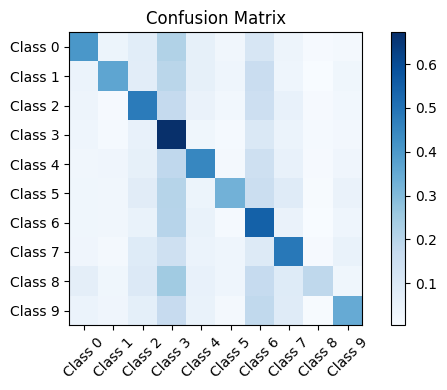

In [ ]:
normalized_matrix = Confusion_Matrix.astype(np.float64) / np.sum(Confusion_Matrix, axis=1, keepdims=True)

class_labels = [f"Class {c}" for c in range(C)];

plt.figure(figsize=(6, 4))
plt.imshow(normalized_matrix, cmap="Blues")
plt.colorbar()

plt.xticks(range(len(class_labels)), class_labels, rotation=45)
plt.yticks(range(len(class_labels)), class_labels)
plt.title("Confusion Matrix")


plt.tight_layout()
plt.show()


#####**Assuming GMM**

In [ ]:
def get_gaussian_GMM(x, m, S):

  d = len(x);

  det = 1.0;
  exponent = 0.0;

  for i in range(d):
    det *= S[i];
    exponent += ((x[i] - m[i])**2 ) / S[i];

  det = np.sqrt(det);

  return (1.0 / det) * np.exp( -exponent );

In [ ]:
def get_log_likelihood_GMM(X, m, S, pi):

  N = len(X);
  K = len(m);

  log_likelihood = 0.0;
  for n in range(N):

    inner_sum = 0.0;
    for k in range(K):
      inner_sum += pi[k] * get_gaussian_GMM(X[n], m[k], S[k]);

    log_likelihood += np.log(inner_sum);

  return log_likelihood;

In [ ]:
def perform_EM_for_GMM(X, m, S, pi):

  N = len(X);
  d = len(X[0]);
  K = len(m);
  gamma = np.zeros((N, K), dtype = float);
  N_list = np.zeros(K, dtype = float);

  #E-step
  for n in range(N):

    for k in range(K):
      gamma[n][k] = pi[k] * get_gaussian_GMM(X[n], m[k], S[k]);
    gamma[n] /= sum(gamma[n]);

  #Calcuate N_k values
  for k in range(K):

    temp_sum = 0.0;
    for n in range(N):
      temp_sum += gamma[n][k];
    N_list[k] = temp_sum;

  #M-step
  for k in range(K):

    sum_gamma_x = np.zeros(d, dtype = float);
    for n in range(N):
      sum_gamma_x += (X[n] * gamma[n][k]);
    m[k] = sum_gamma_x / N_list[k];

    sum_for_sigma = np.zeros(d, dtype = float);
    for n in range(N):
      sum_for_sigma += (np.array([(X[n][i] - m[k][i])**2 for i in range(d)]) * gamma[n][k]);
    pi[k] = N_list[k] / N;
    S[k] = sum_for_sigma / N_list[k];

  return m, S, pi;

In [ ]:
#Pi represents the mixing densities
def GMM_multi(X, Y, K):

  d = len(X[0]);

  M = np.zeros((C, K, d), dtype = float);
  S = np.ones((C, K, d), dtype = float);
  Pi = np.ones((C, K), dtype = float) / K;
  X_per_class = [];

  for c in range(C):

    # print("Solving for class ", c);

    X_c_list = [];
    for i in range(N):
      if(Y[i] == c):
        X_c_list.append(X[i]);
    X_c_list = np.array(X_c_list);
    X_per_class.append(X_c_list);

    prev_log_likelihood = get_log_likelihood_GMM(X_c_list, M[c], S[c], Pi[c]);
    M[c], S[c], Pi[c] = perform_EM_for_GMM(X_c_list, M[c], S[c], Pi[c]);
    curr_log_likelihood = get_log_likelihood_GMM(X_c_list, M[c], S[c], Pi[c]);

    # print("Difference is ", curr_log_likelihood - prev_log_likelihood);
    iter = 0;
    while(curr_log_likelihood - prev_log_likelihood > 0.0):

      prev_log_likelihood = curr_log_likelihood;
      M[c], S[c], Pi[c] = perform_EM_for_GMM(X_c_list, M[c], S[c], Pi[c]);
      curr_log_likelihood = get_log_likelihood_GMM(X_c_list, M[c], S[c], Pi[c]);
      print("Difference is ", curr_log_likelihood - prev_log_likelihood);

      iter += 1;
      if(iter >= 20):
        print(iter)
        break
    # print("Total iterations = ", iter)
  return M, S, Pi

In [ ]:
#Predicted classes in h_X_GMM
def get_hX_GMM(X_test, K, M, S, Pi):

  h_X_GMM = [];
  N_test = len(X_test);
  d = len(X[0]);

  for n in range(N_test):
    x = X_test[n];
    # y = Y_test[n];

    P_y_given_x_predicted = np.zeros(C, dtype = float);

    for c in range(C):

      p_x_val = 0.0;
      for k in range(K):
        p_x_val += np.log(Pi[c][k]) - sum([((x[i] - M[c][k][i])**2) / S[c][k][i] for i in range(d)]);

      P_y_given_x_predicted[c] = p_x_val;

    index = np.argmax(P_y_given_x_predicted);
    h_X_GMM.append(index);

  return np.array(h_X_GMM);

In [ ]:
# Get the confusion matrix values - TP, TN, FP, FN
def get_confusion_matrix(h_X_GMM, Y_test, C):

  True_Pos = np.zeros(C, dtype = float);
  False_Pos = np.zeros(C, dtype = float);
  True_Neg = np.zeros(C, dtype = float);
  False_Neg = np.zeros(C, dtype = float);


  for c in range(C):

    for i in range(N_test):

      if(Y_test[i] == c and h_X_GMM[i] == c):
        True_Pos[c] += 1.0;
        True_Neg += 1.0;
        True_Neg[c] -= 1.0;

      if(Y_test[i] == c and h_X_GMM[i] != c):
        False_Neg[c] += 1.0;
        False_Pos[h_X_GMM[i]] += 1.0;
        True_Neg[h_X_GMM[i]] += 1.0;

  return True_Pos, True_Neg, False_Pos, False_Neg;

In [ ]:
def print_scores(True_Pos, True_Neg, False_Pos, False_Neg):

  accu_GMM_test = 100 * (True_Pos + True_Neg) / (True_Pos + True_Neg + False_Pos + False_Neg);

  f1_score_GMM_test = (2 * True_Pos) / (2*True_Pos + False_Pos + False_Neg);

  print("Accuracy : \n");
  for c in range(C):
    print("For class ", c, " accuracy  = ", accu_GMM_test[c], "%");
  print("\n\nF1 score : \n");
  for c in range(C):
    print("For class ", c, ",f1 score is ", f1_score_GMM_test[c]);

In [ ]:
No_of_K = 4;
log_likelihoods = np.zeros((C, No_of_K), dtype = float);
K_vals = np.zeros((C, No_of_K), dtype = float);

True_Pos_list = [];
False_Pos_list = [];

for k in range(2, 2 + No_of_K):
  M, S, Pi = GMM_multi(X, Y, k);
  h_X_GMM = get_hX_GMM(X_test, k, M, S, Pi);
  True_Pos, True_Neg, False_Pos, False_Neg = get_confusion_matrix(h_X_GMM, Y_test, C);

  True_Pos_list.append(True_Pos);
  False_Pos_list.append(False_Pos);

  for c in range(C):

    X_c_list = [];
    for i in range(N_test):
      if(Y_test[i] == c):
        X_c_list.append(X_test[i]);
    X_c_list = np.array(X_c_list);

    log_likelihoods[c][k-2] = get_log_likelihood_GMM(X_c_list, M[c], S[c], Pi[c]);
    K_vals[c][k-2] = k;

  for _ in range(150):
    print("-", end = '');
  print("\n\t\tUsing ", k, "Gaussians\n");
  print_scores(True_Pos, True_Neg, False_Pos, False_Neg);


Difference is  22759.490607839893
Difference is  0.0
Total iterations =  1
Difference is  19111.571609345847
Difference is  0.0
Total iterations =  1
Difference is  21915.163754482986
Difference is  0.0
Total iterations =  1
Difference is  15218.718399398567
Difference is  0.0
Total iterations =  1
Difference is  21847.425482566425
Difference is  0.0
Total iterations =  1
Difference is  19259.738998557295
Difference is  0.0
Total iterations =  1
Difference is  20068.689064948805
Difference is  0.0
Total iterations =  1
Difference is  14352.538207889476
Difference is  0.0
Total iterations =  1
Difference is  20222.99180439477
Difference is  0.0
Total iterations =  1
Difference is  20602.803945859167
Difference is  0.0
Total iterations =  1
------------------------------------------------------------------------------------------------------------------------------------------------------
		Using  2 Gaussians

Accuracy : 

For class  0  accuracy  =  78.3180026281209 %
For class  1  accur

In [ ]:
False_Pos_list = np.transpose(np.array(False_Pos_list));
print(False_Pos_list.shape);

(4, 10)


In [ ]:
True_Pos_list = np.transpose(np.array(True_Pos_list));
False_Pos_list = np.transpose(np.array(False_Pos_list));
print(True_Pos_list.shape);
print(False_Pos_list.shape)

(10, 4)
(10, 4)


In [ ]:
print(True_Pos_list[2])

[268. 268. 268. 268.]


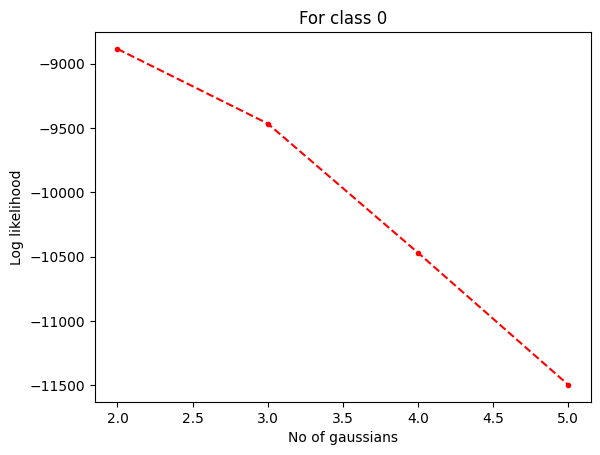

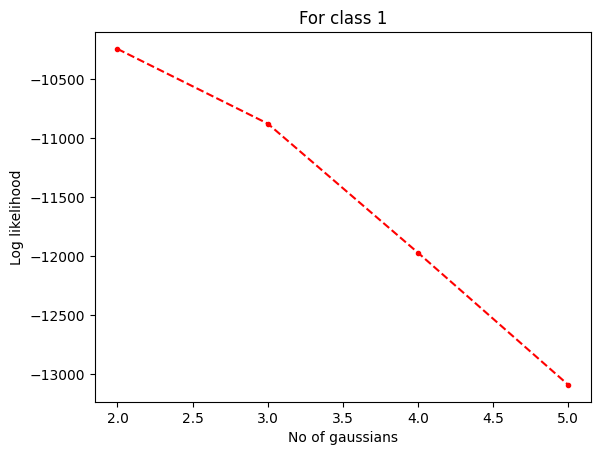

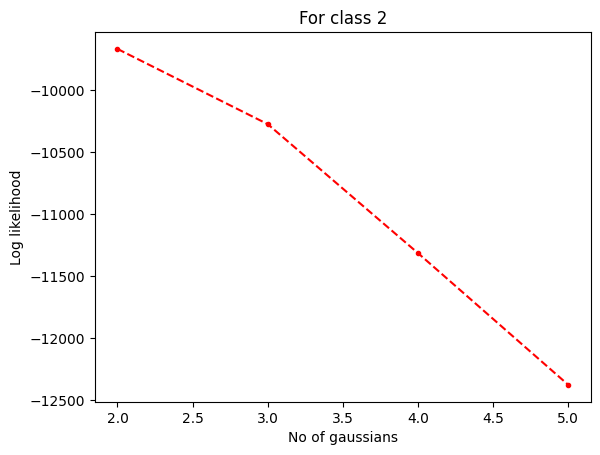

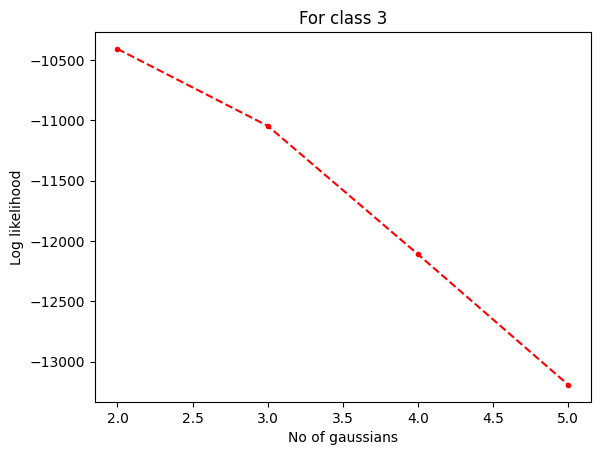

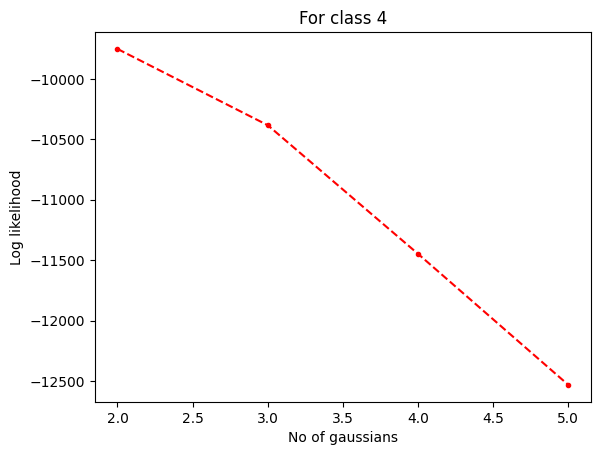

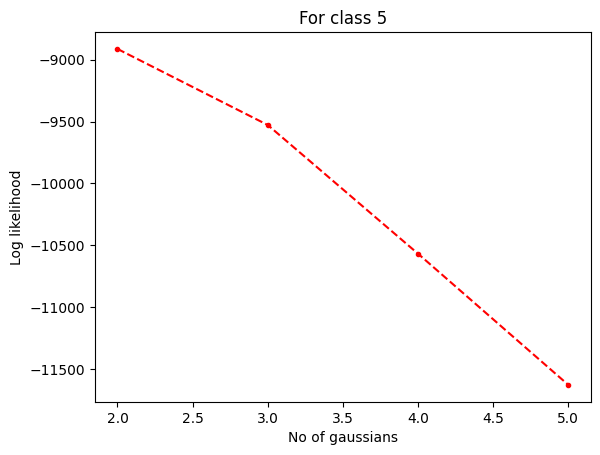

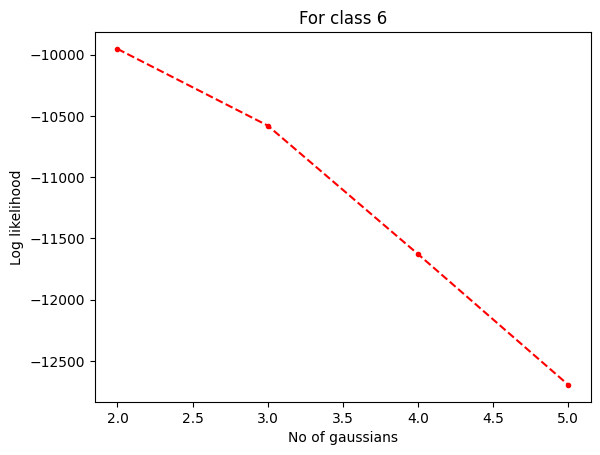

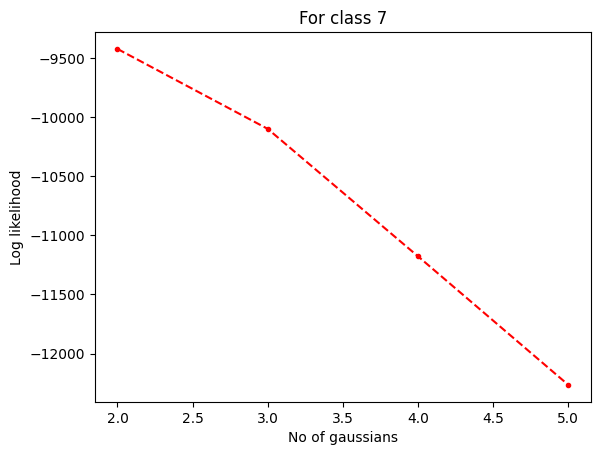

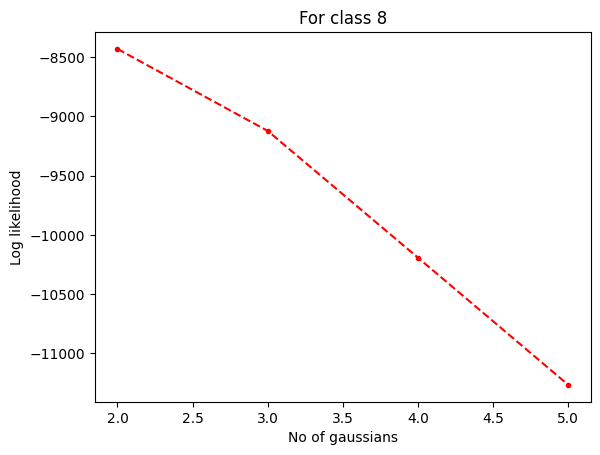

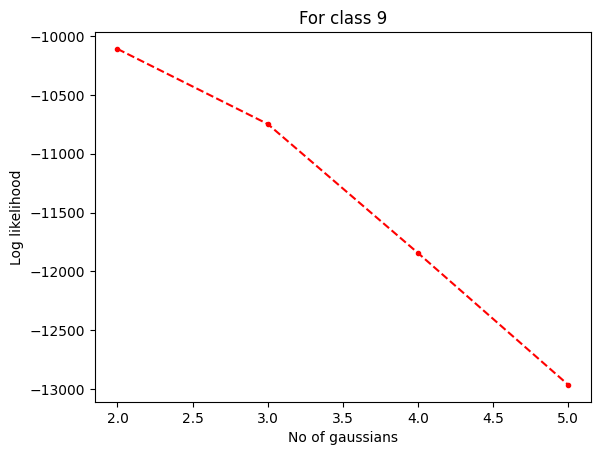

In [ ]:
for c in range(C):
  plt.plot(K_vals[c], log_likelihoods[c], marker = '.', linestyle = '--', color = 'red');
  plt.xlabel('No of gaussians');
  plt.ylabel('Log likelihood');
  plt.title(f"For class {c}");
  plt.show();

#####**Using Parzen Window**

In [ ]:
def get_parzen_class(x, X, Y, C, P, h):

  class_bin = np.zeros(C, dtype = int);
  N = len(Y);

  for c in range(C):

    intermediate_sum = 0.0;
    N_c = 0.0;

    for n in range(N):
      if(Y[n] == c):
        intermediate_sum += np.linalg.norm(x - X[n]);
        N_c += 1;
    class_bin[c] = -np.log(N_c) - intermediate_sum + np.log(P[c]);

  return np.argmax(class_bin);

In [ ]:
#Using two parzen windows with side lengths h1 and h2
h1 = 0.5;
h2 = 2.0;

h_X_h1 = [];
h_X_h2 = [];

for i in range(N_test):
  h_X_h1.append(get_parzen_class(X_test[i], X[:5000], Y[:5000], C, P, h1));
  h_X_h2.append(get_parzen_class(X_test[i], X[:5000], Y[:5000], C, P, h2));

In [ ]:
Confusion_Matrix_Parzen = np.zeros((2, C, C), dtype = float);

for i in range(N_test):
  actual_class = int(Y_test[i]);
  predicted_class0 = h_X_h1[i];
  predicted_class1 = h_X_h2[i];

  Confusion_Matrix_Parzen[0][actual_class][predicted_class0] += 1;
  Confusion_Matrix_Parzen[1][actual_class][predicted_class1] += 1;

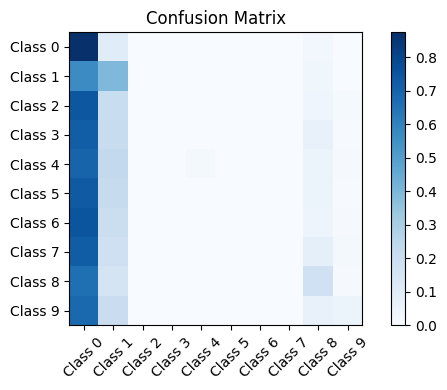

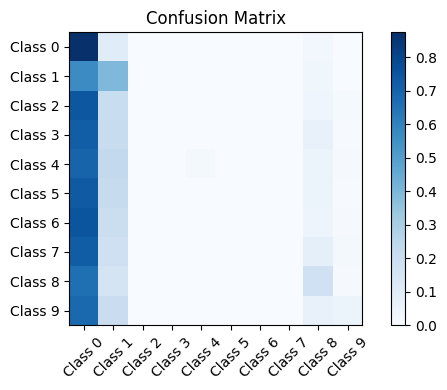

In [ ]:
for h in range(2):
  normalized_matrix = Confusion_Matrix_Parzen[h].astype(np.float64) / np.sum(Confusion_Matrix_Parzen[h], axis=1, keepdims=True)

  class_labels = [f"Class {c}" for c in range(C)];

  plt.figure(figsize=(6, 4))
  plt.imshow(normalized_matrix, cmap="Blues")
  plt.colorbar()

  plt.xticks(range(len(class_labels)), class_labels, rotation=45)
  plt.yticks(range(len(class_labels)), class_labels)
  plt.title("Confusion Matrix")


  plt.tight_layout()
  plt.show()

#####**Using K-Nearest Neighbour**

In [ ]:
def get_class_KNN_euclid(x, X, Y, P, C, K):

  N = len(X);

  list_of_dist = np.array([np.linalg.norm(x - X[i]) for i in range(N)]);
  Y_temp = np.array([Y[i] for i in range(N)]);
  class_bin = np.zeros(C, dtype = int)

  for i in range(K+1):
    index = np.argmin(list_of_dist[i:]);
    list_of_dist[i], list_of_dist[index + i] = list_of_dist[index + i], list_of_dist[i];
    Y_temp[i], Y_temp[index + i] = Y_temp[index + i], Y_temp[i];

    class_bin[int(Y_temp[i])] += 1;

  return np.argmax(class_bin);

In [ ]:
def get_class_KNN_cosine(x, X, Y, P, C, K):

  N = len(X);
  list_of_dist = np.array([np.arccos(np.dot(x, X[i]) / (np.linalg.norm(x) * np.linalg.norm(X[i]))) for i in range(N)]);
  Y_temp = np.array([Y[i] for i in range(N)]);
  class_bin = np.zeros(C, dtype = int)

  for i in range(K):
    index = np.argmin(list_of_dist[i:]);
    list_of_dist[i], list_of_dist[index + i] = list_of_dist[index + i], list_of_dist[i];
    Y_temp[i], Y_temp[index + i] = Y_temp[index + i], Y_temp[i];

    class_bin[int(Y_temp[i])] += 1;

  return np.argmax(class_bin);

In [ ]:
#Using K = 20, and K = 50
N_test = len(X_test);

K1 = 20;
K2 = 50;

h_X_KNN_1_euclid = [];
h_X_KNN_2_euclid = [];

h_X_KNN_1_cosine = [];
h_X_KNN_2_cosine = [];

for i in range(N_test):
  h_X_KNN_1_euclid.append(get_class_KNN_euclid(X_test[i], X[:10000], Y[:10000], P, C, K1));
  h_X_KNN_2_euclid.append(get_class_KNN_euclid(X_test[i], X[:10000], Y[:10000], P, C, K2));

  h_X_KNN_1_cosine.append(get_class_KNN_cosine(X_test[i], X[:10000], Y[:10000], P, C, K1));
  h_X_KNN_2_cosine.append(get_class_KNN_cosine(X_test[i], X[:10000], Y[:10000], P, C, K2));

KeyboardInterrupt: 

In [ ]:
def show_confusion_matrix(Confusion_Matrix):

  normalized_matrix = Confusion_Matrix.astype(np.float64) / np.sum(Confusion_Matrix, axis=1, keepdims=True)

  class_labels = [f"Class {c}" for c in range(C)];

  plt.figure(figsize=(6, 4))
  plt.imshow(normalized_matrix, cmap="Blues")
  plt.colorbar()

  plt.xticks(range(len(class_labels)), class_labels, rotation=45)
  plt.yticks(range(len(class_labels)), class_labels)
  plt.title("Confusion Matrix")


  plt.tight_layout()
  plt.show()

In [ ]:
Confusion_Matrix_euclid = np.zeros((2, C, C), dtype = int);
Confusion_Matrix_cosine = np.zeros((2, C, C), dtype = int);

for i in range(N_test):

  actual_class_K1_euclid = Y_test[i];
  predicted_class_K1_euclid = h_X_KNN_1_euclid[i];
  Confusion_Matrix_euclid[0][actual_class_K1_euclid][predicted_class_K1_euclid] += 1;

  actual_class_K2_euclid = Y_test[i];
  predicted_class_K2_euclid = h_X_KNN_2_euclid[i];
  Confusion_Matrix_euclid[1][actual_class_K2_euclid][predicted_class_K2_euclid] += 1;

  actual_class_K1_cosine = Y_test[i];
  predicted_class_K1_cosine = h_X_KNN_1_euclid[i];
  Confusion_Matrix_cosine[0][actual_class_K1_cosine][predicted_class_K1_cosine] += 1;

  actual_class_K2_cosine = Y_test[i];
  predicted_class_K2_cosine = h_X_KNN_1_euclid[i];
  Confusion_Matrix_cosine[1][actual_class_K2_cosine][predicted_class_K2_cosine] += 1;


In [ ]:
print("For K = ", K1, "Using Euclidean distance, Confusion Matrix :\n");
show_confusion_matrix(Confusion_Matrix_euclid[0])

print("For K = ", K2, "Using Euclidean distance, Confusion Matrix :\n");
show_confusion_matrix(Confusion_Matrix_euclid[1])

print("For K = ", K1, "Using Cosine distance, Confusion Matrix :\n");
show_confusion_matrix(Confusion_Matrix_cosine[0])

print("For K = ", K2, "Using Cosine, Confusion Matrix :\n");
show_confusion_matrix(Confusion_Matrix_cosine[1])

#####**Using linear method, W_c and W_0_c for class 'c'**

In [61]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [67]:
def logistic_regression(X, Y, learning_rate, num_iters, c):

  d = len(X[0]);
  theta = np.zeros(d, dtype = float);

  for _ in range(num_iters):
    predicted_prob = sigmoid(np.dot(X, theta))

    gradient = np.dot(X.T, (predicted_prob - Y))

    theta -= learning_rate * gradient
    if(np.linalg.norm(gradient) < 0.0001):
      break;

  return theta

In [63]:
def get_hX_linear_bin(theta, threshold):

  h_X_W = [];
  for i in range(N_test):

    val = sigmoid(np.dot(X_test[i], theta));

    if(val < threshold):
      h_X_W.append(0);
    else:
      h_X_W.append(1);

  return h_X_W

In [64]:
def plot_for_class(theta, c):
  True_Pos_list = [];
  False_Pos_list = [];



  for threshold in range(0, 100, 1):

    Confusion_Matrix = np.zeros((2, 2), dtype = int);
    h_X_W = get_hX_linear_bin(theta, float(threshold / 100.0));

    for i in range(N_test):
      y = int(Y_test[i]);
      if(y == c):
        class_val = 1;
      else:
        class_val = 0;
      actual_class_linear_bin = class_val;
      predicted_class_linear_bin = h_X_W[i];

      Confusion_Matrix[actual_class_linear_bin][predicted_class_linear_bin] += 1;

    TP = Confusion_Matrix[0, 0]
    FP = Confusion_Matrix[1, 0]
    TN = Confusion_Matrix[1, 1]
    FN = Confusion_Matrix[0, 1]

    # Calculate TPR and FPR
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    True_Pos_list.append(TPR);
    False_Pos_list.append(FPR);

    # accuracy = 100 * float(TP + TN) / float(TP + TN + FP + FN)

  plt.plot(False_Pos_list, True_Pos_list);
  plt.ylabel('True Positive');
  plt.xlabel('False Positive');
  plt.title(f"Class {c}");
  plt.show();

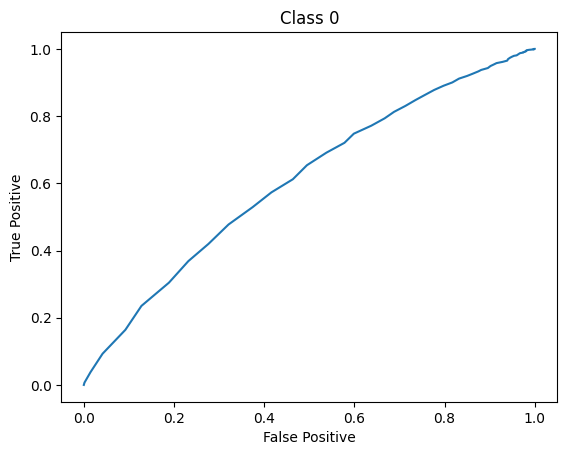

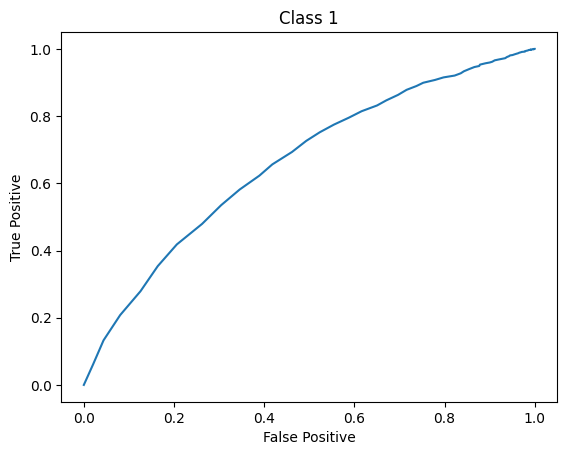

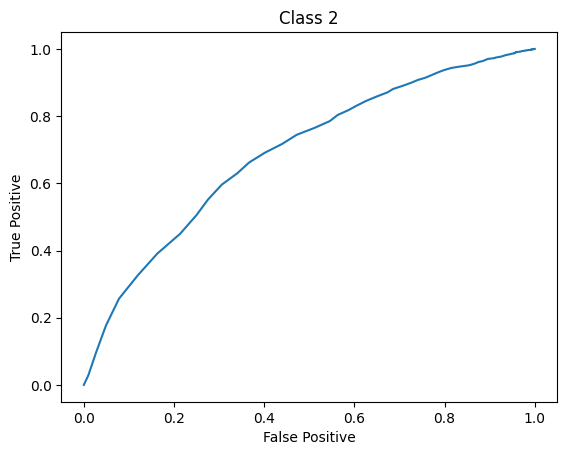

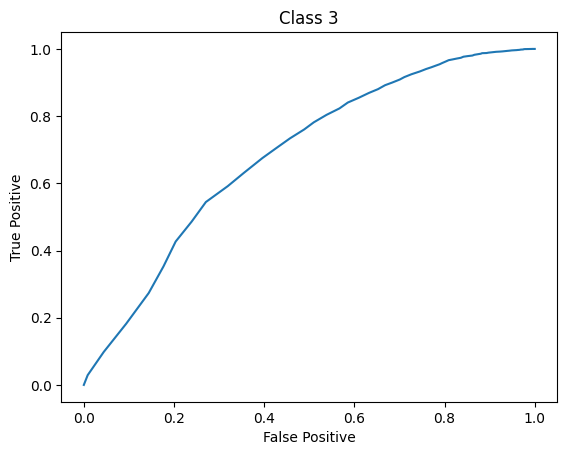

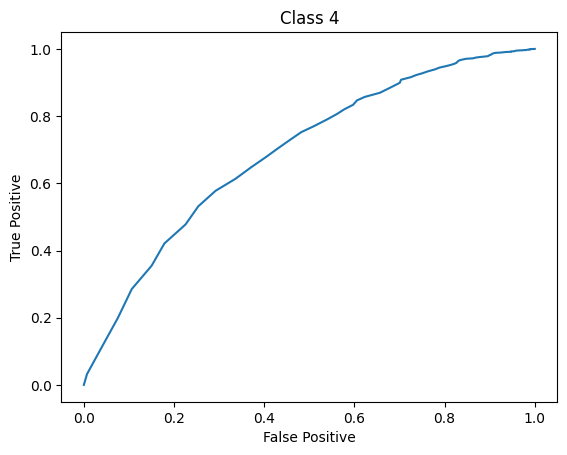

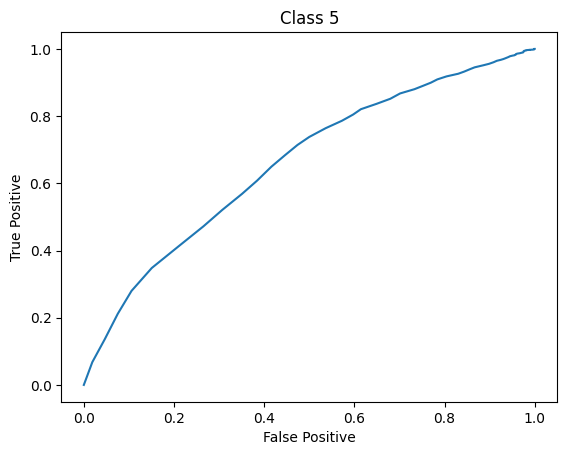

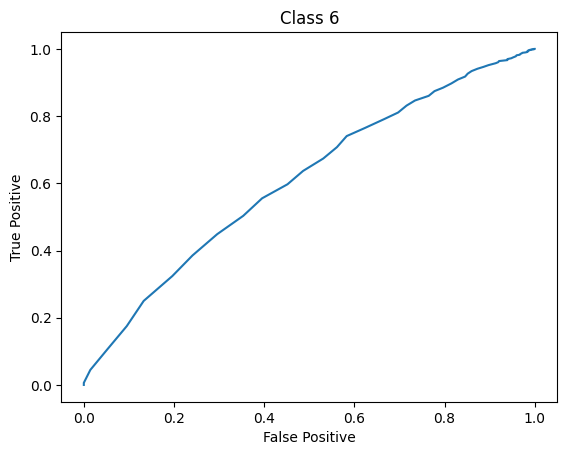

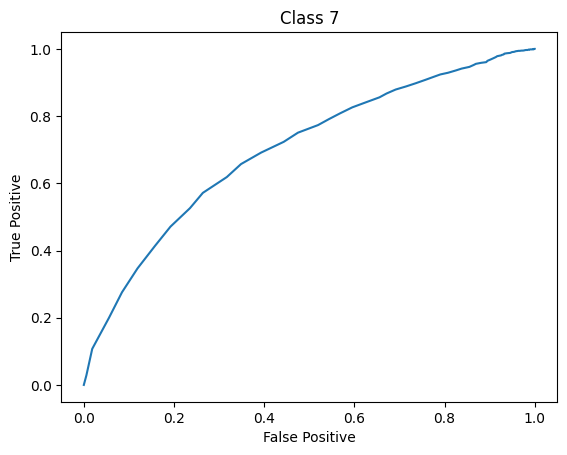

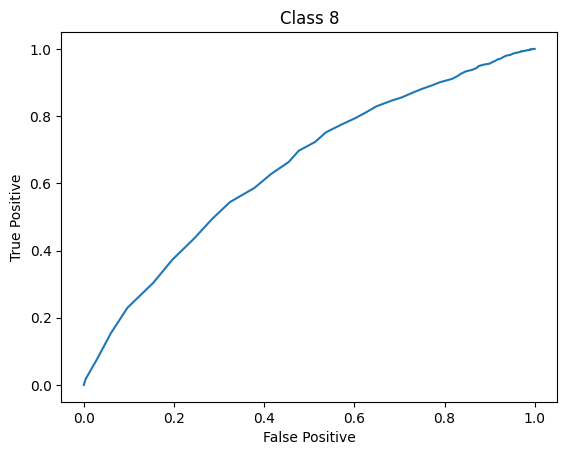

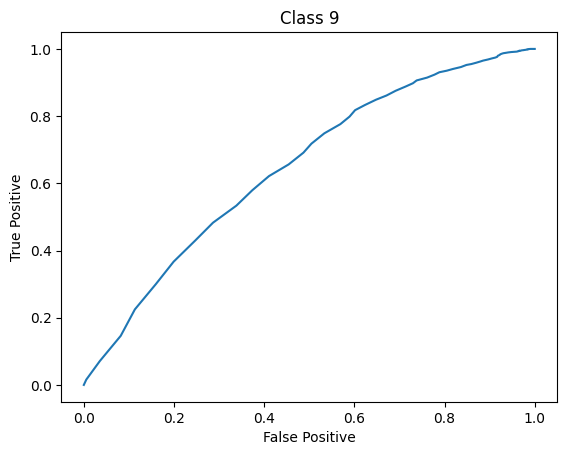

In [68]:
learning_rate = 0.00001
num_iters = 50000

for c in range(C):

  Y_c = [];
  for i in range(N):
    if(Y[i] == c):
      Y_c.append(1);
    else:
      Y_c.append(0);

  Y_c = np.array(Y_c);

  theta = logistic_regression(X, Y_c, learning_rate, num_iters, c)
  plot_for_class(theta, c);